# Assignment #1

Author: Isaia Pacheco

Collaborators: None

Integrity Statement: Did you use an LLM to write any of the code in your assignment? (Y/N): Yes, used to create mappings in section four

# Instructions

You are permitted to work with a partner in the class to complete your assignment, but no more than one partner. However, every student must submit their own copy of the assignment, and must list your collaborators.

You should refer to your textbook and posted course materials as resources. You are also allowed to use the documentation for python, pandas, matplotlib, and seaborn. You may not use other online resources or LLMs for this assignment.

You will be graded based on (1) correctness, (2) completeness, (3) documentation, and (4) overall readability of your notebook. The assignment will be worth a total of 100 points in the Homework category (15% of your grade).

**Submission and Deadline: This assignment must be submitted on Canvas before class begins on Wednesday, September 17.**

You must complete all of the steps below:

1. Organize your project in a project folder (or repo) with three subfolders: src, data, and presentations. Place the provided dataset in the data folder, and the two provided notebooks in the src folder.
2. Use a python virtual environment, install the libraries you use, and create a requirements.txt file (using `pip freeze`)
3. Open and read through the provided data cleaning notebook to understand the cleaning process and all of its operations. (Fair game).
4. Run the separate notebook provided for cleaning the CDC data. It should create a new file. You do not need to edit that notebook at all, and only need to run it once. All coding will take place in this notebook.

The rest of the assignment should be completed in this notebook:

1. Read in the clean data in from the provided csv file and write code to examine it and understand it
2. Write code to determine which cancer site had the highest incidence of new cases for females in each individual year included in the dataset, and present your results
3. Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)
4. Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each individual cancer site (many lines)
5. Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females
6. Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000
7. For each cancer site and each year, determine whether males or females had the higher incidence (hint: groupby)
8. Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined
9. Add your full name and the full names of your collaborator (if any) at the top of this document. Answer the integrity statement. 
10. Submit this notebook on Canvas together with the requirements.txt file

**NOTE:** For each plot, add a descriptive title and label the axes appropriately, and remark on any observations that you make.

**HINT #1:** Most problems can be solved by some combination of filtering and/or groupby before aggregating (e.g., taking the max) and plotting.

**HINT #2:** You can solve these problems in any order, so do the ones you find easiest first and the rest will start to feel easier.

**Useful Documentation**
- Pandas general documentation: https://pandas.pydata.org/docs/user_guide/index.html
- Pandas dataframe reshaping: https://pandas.pydata.org/docs/user_guide/reshaping.html
- Pandas Copy-on-Write: https://pandas.pydata.org/docs/user_guide/copy_on_write.html
- Pandas missing data: https://pandas.pydata.org/docs/user_guide/missing_data.html
- Pandas split-apply-combine (groupby, agg): https://pandas.pydata.org/docs/user_guide/groupby.html 

- Matplotlib documentation: https://matplotlib.org/stable/plot_types/index.html
- Seaborn documentation: https://seaborn.pydata.org/


# Imports and CoW

In [1]:
from itertools import groupby

#Uncomment the libraries you need. Be sure to install whichever ones you need into your Python virtual environment. You may also need to also install Jupyter or iPython to run your notebook, depending on your setup.

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
pd.options.mode.copy_on_write = True  # will be the default in pandas 3.0, best to enforce it

# 1. Read in Data

In [3]:
CWD = Path.cwd()
ASSIGNMENT1 = CWD.parent
DATA = ASSIGNMENT1.joinpath('data')
FILE = 'clean_cdc_cancer.csv'
PATH = DATA.joinpath(FILE)

In [4]:
if PATH.exists():
    print("Found the data file")
else:
    raise Exception("Could not find that file in that directory: ", PATH)

Found the data file


In [5]:
cancer_df = pd.read_csv(PATH)

In [6]:
cancer_df.shape

(4631, 12)

4633 (lines in files) - 2 (line for the header and the empty row) = 46331, 12 (column labels), the shape is what we expect.

In [7]:
cancer_df.columns

Index(['Cancer Sites', 'Cancer Sites Code', 'Year', 'Sex', 'Count',
       'Population', 'Age-Adjusted Rate',
       'Age-Adjusted Rate Lower 95% Confidence Interval',
       'Age-Adjusted Rate Upper 95% Confidence Interval', 'Crude Rate',
       'Crude Rate Lower 95% Confidence Interval',
       'Crude Rate Upper 95% Confidence Interval'],
      dtype='object')

In [8]:
AGE_ADJUSTED_RATE = "Age-Adjusted Rate"
AGE_ADJUSTED_RATE_LCI = "Age-Adjusted Rate Lower 95% Confidence Interval"
AGE_ADJUSTED_RATE_UCI = "Age-Adjusted Rate Upper 95% Confidence Interval"
CANCER_SITES = "Cancer Sites"
CANCER_SITES_CODE = "Cancer Sites Code"
COUNT = "Count"
CRUDE_RATE = "Crude Rate"
CRUDE_RATE_LCI = "Crude Rate Lower 95% Confidence Interval"
CRUDE_RATE_UCI = "Crude Rate Upper 95% Confidence Interval"
POPULATION = "Population"
SEX = "Sex"
YEAR = "Year"

# 2. Incidence for Females Each Year

Write code to determine which cancer site had the highest incidence of new cases for females in each year 1999-2022 (hint: filter then groupby then agg)

In [9]:
MALE = 'M'
FEMALE = 'F'
ALL_INVASIVE_CANCER_SITES_COMBINED = "All Invasive Cancer Sites Combined"
MAX_COUNT = 'Max(Count)'

In [10]:
females_cases_1999_to_2022_df = cancer_df[
    (cancer_df[SEX] == FEMALE) &
    (1999 <= cancer_df[YEAR]) &
    (cancer_df[YEAR] <= 2022)
    ].groupby([CANCER_SITES, YEAR])[COUNT].max().reset_index(name=MAX_COUNT)

females_cases_1999_to_2022_df.iloc[females_cases_1999_to_2022_df[MAX_COUNT].idxmax()]

Cancer Sites    All Invasive Cancer Sites Combined
Year                                          2021
Max(Count)                                  918189
Name: 118, dtype: object

All invasive cancer sites is not very informative so Im going to filter out "All Invasive Cancer Sites Combined"

In [11]:
females_cases_1999_to_2022_df = cancer_df[
    (cancer_df[SEX] == FEMALE) &
    (1999 <= cancer_df[YEAR]) &
    (cancer_df[YEAR] <= 2022) &
    (cancer_df[CANCER_SITES] != ALL_INVASIVE_CANCER_SITES_COMBINED)
    ].groupby([CANCER_SITES, YEAR])[COUNT].max().reset_index(name=MAX_COUNT)

females_cases_1999_to_2022_df.iloc[females_cases_1999_to_2022_df[MAX_COUNT].idxmax()]

Cancer Sites    Female Breast
Year                     2021
Max(Count)             282273
Name: 574, dtype: object

# 3. Line plots for male and female, all sites

Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)

In [12]:
def custom_format(number, _):
    if number < 1_000:
        return f"{number:.2f}"
    elif number < 1_000_000:
        return f"{number / 1_000:.2f}K"
    elif number < 1_000_000_000:
        return f"{number / 1_000_000:.2f}M"
    else:
        return f"{number / 1_000_000_000:.2f}G"


FORMATTER = FuncFormatter(custom_format)

In [13]:
SUM_COUNT = 'Sum(Count)'

In [14]:
all_invasive_sites_df = cancer_df[
    cancer_df[CANCER_SITES] == ALL_INVASIVE_CANCER_SITES_COMBINED
    ].groupby([CANCER_SITES, YEAR, SEX])[COUNT].sum().reset_index(name=SUM_COUNT)
all_invasive_sites_df.head()

,Cancer Sites,Year,Sex,Sum(Count)
0,All Invasive Cancer Sites Combined,1999,F,631741
1,All Invasive Cancer Sites Combined,1999,M,672530
2,All Invasive Cancer Sites Combined,2000,F,641968
3,All Invasive Cancer Sites Combined,2000,M,690598
4,All Invasive Cancer Sites Combined,2001,F,662313


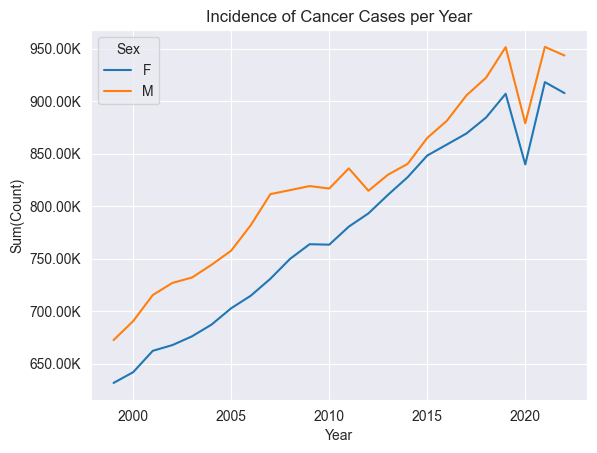

In [15]:
plot = sns.lineplot(data=all_invasive_sites_df, x=YEAR, y=SUM_COUNT, hue=SEX)
plot.set_title(label='Incidence of Cancer Cases per Year')
plot.yaxis.set_major_formatter(FORMATTER)

# 4. Line plots for cancer sites

 Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each cancer site (many lines)

In [16]:
yearly_site_for_females_df = cancer_df[
    (cancer_df[SEX] == FEMALE)
].groupby(
    [YEAR, CANCER_SITES, SEX]
)[COUNT].sum().reset_index(name=SUM_COUNT)

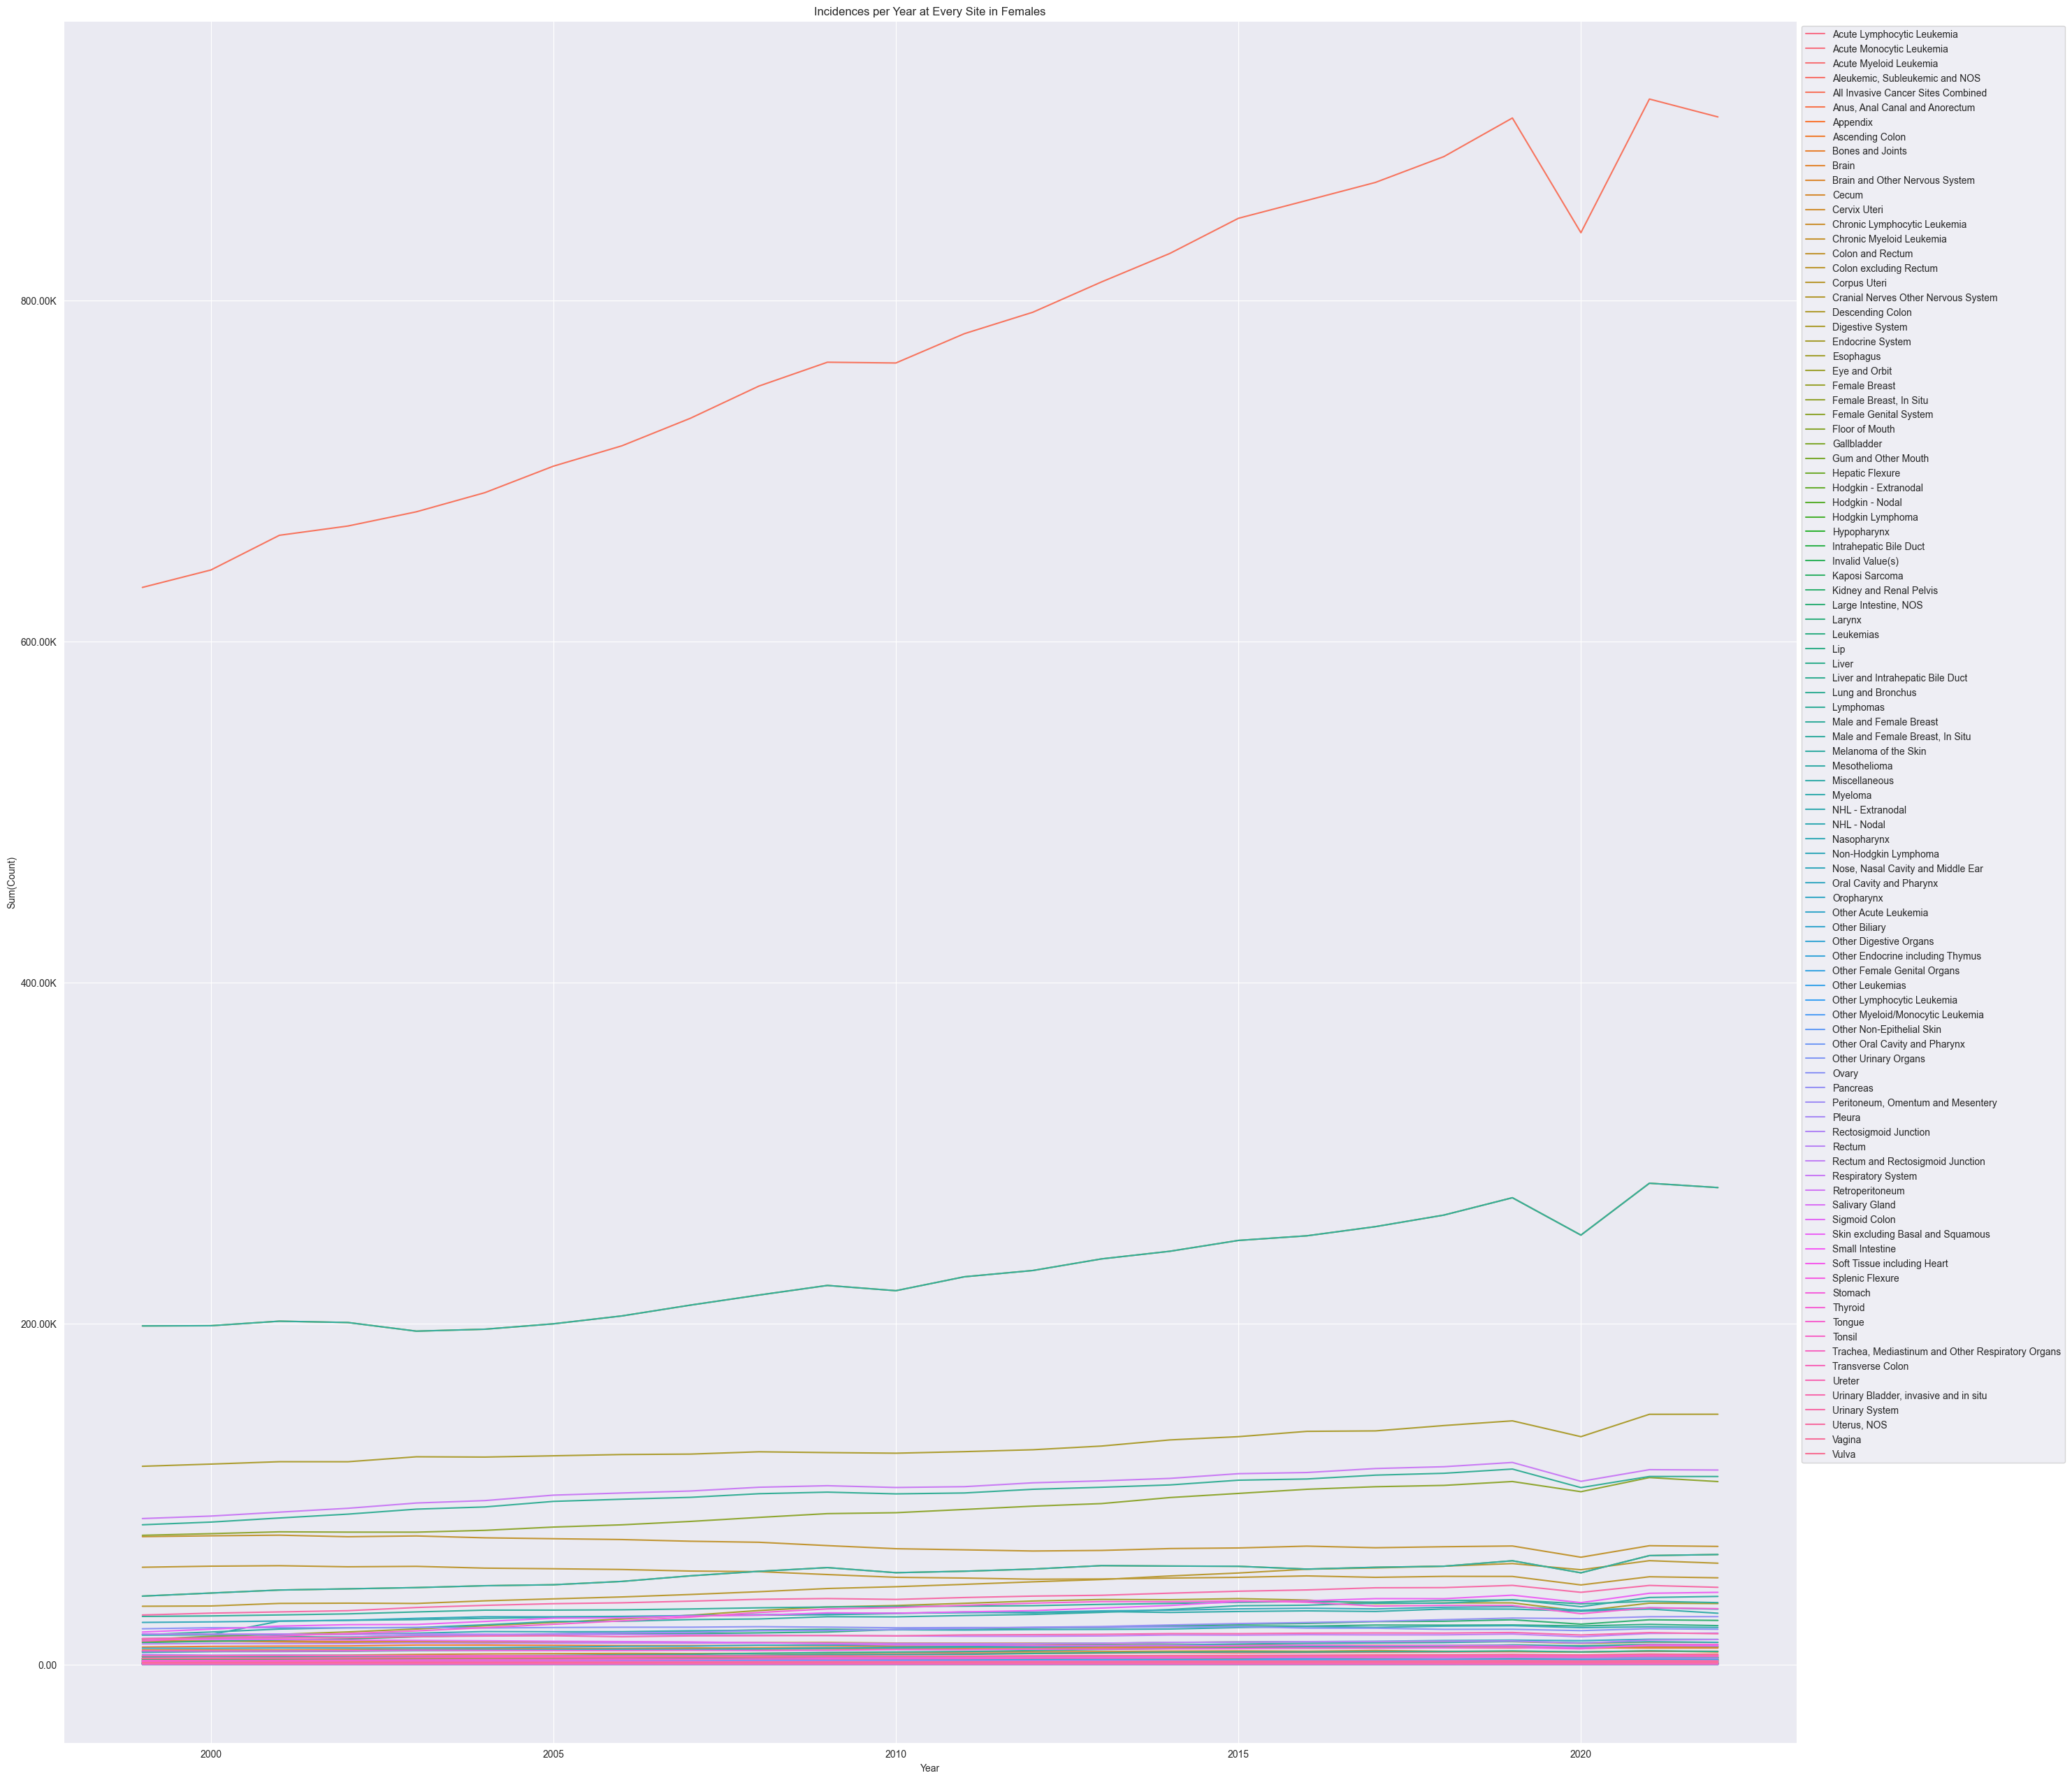

In [17]:
plt.figure(figsize=(32, 32))
plot = sns.lineplot(yearly_site_for_females_df, x=YEAR, y=SUM_COUNT, hue=CANCER_SITES)
plot.yaxis.set_major_formatter(FORMATTER)
plot.set_title("Incidences per Year at Every Site in Females")
plot.axes.legend(bbox_to_anchor=(1, 1, 0, 0))

In [18]:
cancer_df[CANCER_SITES].sort_values().unique()

array(['Acute Lymphocytic Leukemia', 'Acute Monocytic Leukemia',
       'Acute Myeloid Leukemia', 'Aleukemic, Subleukemic and NOS',
       'All Invasive Cancer Sites Combined',
       'Anus, Anal Canal and Anorectum', 'Appendix', 'Ascending Colon',
       'Bones and Joints', 'Brain', 'Brain and Other Nervous System',
       'Cecum', 'Cervix Uteri', 'Chronic Lymphocytic Leukemia',
       'Chronic Myeloid Leukemia', 'Colon and Rectum',
       'Colon excluding Rectum', 'Corpus Uteri',
       'Cranial Nerves Other Nervous System', 'Descending Colon',
       'Digestive System', 'Endocrine System', 'Esophagus',
       'Eye and Orbit', 'Female Breast', 'Female Breast, In Situ',
       'Female Genital System', 'Floor of Mouth', 'Gallbladder',
       'Gum and Other Mouth', 'Hepatic Flexure', 'Hodgkin - Extranodal',
       'Hodgkin - Nodal', 'Hodgkin Lymphoma', 'Hypopharynx',
       'Intrahepatic Bile Duct', 'Invalid Value(s)', 'Kaposi Sarcoma',
       'Kidney and Renal Pelvis', 'Large Intestine

In [19]:
cancer_df[CANCER_SITES].nunique()

105

There are way too many cancer sites to compare. Cancer sites values can be reduced. For example, Ureter, Urinary Bladder, Vagina, Vulva can be consolidated into a reproductive organ system. I will attempt to consolidate the values to system sites, which is more reasonable to compare. and it may still give intuition where cancer incidences are occurring.

## Proposed Cancer Sites Grouped by System

### Blood & Lymphatic system
- Acute Lymphocytic Leukemia
- Acute Monocytic Leukemia
- Acute Myeloid Leukemia
- Aleukemic, Subleukemic and NOS
- Chronic Lymphocytic Leukemia
- Chronic Myeloid Leukemia
- Hodgkin - Extranodal
- Hodgkin - Nodal
- Hodgkin Lymphoma
- Kaposi Sarcoma
- Leukemias
- Lymphomas
- Myeloma
- NHL - Extranodal
- NHL - Nodal
- Non-Hodgkin Lymphoma
- Other Acute Leukemia
- Other Leukemias
- Other Lymphocytic Leukemia
- Other Myeloid/Monocytic Leukemia

---

### Digestive system
- Anus, Anal Canal and Anorectum
- Appendix
- Ascending Colon
- Cecum
- Colon and Rectum
- Colon excluding Rectum
- Descending Colon
- Digestive System
- Esophagus
- Floor of Mouth
- Gallbladder
- Gum and Other Mouth
- Hepatic Flexure
- Hypopharynx
- Intrahepatic Bile Duct
- Large Intestine, NOS
- Lip
- Liver
- Liver and Intrahepatic Bile Duct
- Nasopharynx
- Oral Cavity and Pharynx
- Oropharynx
- Other Biliary
- Other Digestive Organs
- Other Oral Cavity and Pharynx
- Pancreas
- Peritoneum, Omentum and Mesentery
- Rectosigmoid Junction
- Rectum
- Rectum and Rectosigmoid Junction
- Retroperitoneum
- Salivary Gland
- Sigmoid Colon
- Small Intestine
- Splenic Flexure
- Stomach
- Tongue
- Tonsil
- Transverse Colon

---

### Endocrine system
- Endocrine System
- Other Endocrine including Thymus
- Thyroid

---

### Integumentary system
- Melanoma of the Skin
- Other Non-Epithelial Skin
- Skin excluding Basal and Squamous

---

### Miscellaneous
- All Invasive Cancer Sites Combined
- Invalid Value(s)
- Miscellaneous

---

### Muscular system
- Soft Tissue including Heart

---

### Nervous system
- Brain
- Brain and Other Nervous System
- Cranial Nerves Other Nervous System
- Eye and Orbit

---

### Reproductive system
- Cervix Uteri
- Corpus Uteri
- Female Breast
- Female Breast, In Situ
- Female Genital System
- Male Breast
- Male Breast, In Situ
- Male Genital System
- Male and Female Breast
- Male and Female Breast, In Situ
- Other Female Genital Organs
- Other Male Genital Organs
- Ovary
- Penis
- Prostate
- Testis
- Uterus, NOS
- Vagina
- Vulva

---

### Respiratory system
- Larynx
- Lung and Bronchus
- Mesothelioma
- Nose, Nasal Cavity and Middle Ear
- Pleura
- Respiratory System
- Trachea, Mediastinum and Other Respiratory Organs

---

### Skeletal system
- Bones and Joints

---

### Urinary system
- Kidney and Renal Pelvis
- Other Urinary Organs
- Ureter
- Urinary Bladder, invasive and in situ
- Urinary System


In [20]:
INTEGUMENTARY = "Integumentary"
SKELETAL = "Skeletal"
MUSCULAR = "Muscular"
NERVOUS = "Nervous"
ENDOCRINE = "Endocrine"
BLOOD_LYMPHATIC = "Blood & Lymphatic"
RESPIRATORY = "Respiratory"
DIGESTIVE = "Digestive"
URINARY = "Urinary"
REPRODUCTIVE = "Reproductive"
MISC = "Miscellaneous"

In [21]:
system_site_map = {
    "Acute Lymphocytic Leukemia": BLOOD_LYMPHATIC,  #1
    "Acute Monocytic Leukemia": BLOOD_LYMPHATIC,  #2
    "Acute Myeloid Leukemia": BLOOD_LYMPHATIC,  #3
    "Aleukemic, Subleukemic and NOS": BLOOD_LYMPHATIC,  #4
    "All Invasive Cancer Sites Combined": MISC,  #5
    "Anus, Anal Canal and Anorectum": DIGESTIVE,  #6
    "Appendix": DIGESTIVE,  #7
    "Ascending Colon": DIGESTIVE,  #8
    "Bones and Joints": SKELETAL,  #9
    "Brain": NERVOUS,  #10
    "Brain and Other Nervous System": NERVOUS,  #11
    "Cecum": DIGESTIVE,  #12
    "Cervix Uteri": REPRODUCTIVE,  #13
    "Chronic Lymphocytic Leukemia": BLOOD_LYMPHATIC,  #14
    "Chronic Myeloid Leukemia": BLOOD_LYMPHATIC,  #15
    "Colon and Rectum": DIGESTIVE,  #16
    "Colon excluding Rectum": DIGESTIVE,  #17
    "Corpus Uteri": REPRODUCTIVE,  #18
    "Cranial Nerves Other Nervous System": NERVOUS,  #19
    "Descending Colon": DIGESTIVE,  #20
    "Digestive System": DIGESTIVE,  #21
    "Endocrine System": ENDOCRINE,  #22
    "Esophagus": DIGESTIVE,  #23
    "Eye and Orbit": NERVOUS,  #24   # sensory organ → nervous
    "Female Breast": REPRODUCTIVE,  #25
    "Female Breast, In Situ": REPRODUCTIVE,  #26
    "Female Genital System": REPRODUCTIVE,  #27
    "Floor of Mouth": DIGESTIVE,  #28
    "Gallbladder": DIGESTIVE,  #29
    "Gum and Other Mouth": DIGESTIVE,  #30
    "Hepatic Flexure": DIGESTIVE,  #31
    "Hodgkin - Extranodal": BLOOD_LYMPHATIC,  #32
    "Hodgkin - Nodal": BLOOD_LYMPHATIC,  #33
    "Hodgkin Lymphoma": BLOOD_LYMPHATIC,  #34
    "Hypopharynx": DIGESTIVE,  #35
    "Intrahepatic Bile Duct": DIGESTIVE,  #36
    "Invalid Value(s)": MISC,  #37
    "Kaposi Sarcoma": BLOOD_LYMPHATIC,  #38
    "Kidney and Renal Pelvis": URINARY,  #39
    "Large Intestine, NOS": DIGESTIVE,  #40
    "Larynx": RESPIRATORY,  #41
    "Leukemias": BLOOD_LYMPHATIC,  #42
    "Lip": DIGESTIVE,  #43
    "Liver": DIGESTIVE,  #44
    "Liver and Intrahepatic Bile Duct": DIGESTIVE,  #45
    "Lung and Bronchus": RESPIRATORY,  #46
    "Lymphomas": BLOOD_LYMPHATIC,  #47
    "Male Breast": REPRODUCTIVE,  #48
    "Male Breast, In Situ": REPRODUCTIVE,  #49
    "Male Genital System": REPRODUCTIVE,  #50
    "Male and Female Breast": REPRODUCTIVE,  #51
    "Male and Female Breast, In Situ": REPRODUCTIVE,  #52
    "Melanoma of the Skin": INTEGUMENTARY,  #53
    "Mesothelioma": RESPIRATORY,  #54
    "Miscellaneous": MISC,  #55
    "Myeloma": BLOOD_LYMPHATIC,  #56
    "NHL - Extranodal": BLOOD_LYMPHATIC,  #57
    "NHL - Nodal": BLOOD_LYMPHATIC,  #58
    "Nasopharynx": DIGESTIVE,  #59
    "Non-Hodgkin Lymphoma": BLOOD_LYMPHATIC,  #60
    "Nose, Nasal Cavity and Middle Ear": RESPIRATORY,  #61
    "Oral Cavity and Pharynx": DIGESTIVE,  #62
    "Oropharynx": DIGESTIVE,  #63
    "Other Acute Leukemia": BLOOD_LYMPHATIC,  #64
    "Other Biliary": DIGESTIVE,  #65
    "Other Digestive Organs": DIGESTIVE,  #66
    "Other Endocrine including Thymus": ENDOCRINE,  #67
    "Other Female Genital Organs": REPRODUCTIVE,  #68
    "Other Leukemias": BLOOD_LYMPHATIC,  #69
    "Other Lymphocytic Leukemia": BLOOD_LYMPHATIC,  #70
    "Other Male Genital Organs": REPRODUCTIVE,  #71
    "Other Myeloid/Monocytic Leukemia": BLOOD_LYMPHATIC,  #72
    "Other Non-Epithelial Skin": INTEGUMENTARY,  #73
    "Other Oral Cavity and Pharynx": DIGESTIVE,  #74
    "Other Urinary Organs": URINARY,  #75
    "Ovary": REPRODUCTIVE,  #76
    "Pancreas": DIGESTIVE,  #77
    "Penis": REPRODUCTIVE,  #78
    "Peritoneum, Omentum and Mesentery": DIGESTIVE,  #79
    "Pleura": RESPIRATORY,  #80
    "Prostate": REPRODUCTIVE,  #81
    "Rectosigmoid Junction": DIGESTIVE,  #82
    "Rectum": DIGESTIVE,  #83
    "Rectum and Rectosigmoid Junction": DIGESTIVE,  #84
    "Respiratory System": RESPIRATORY,  #85
    "Retroperitoneum": DIGESTIVE,  #86
    "Salivary Gland": DIGESTIVE,  #87
    "Sigmoid Colon": DIGESTIVE,  #88
    "Skin excluding Basal and Squamous": INTEGUMENTARY,  #89
    "Small Intestine": DIGESTIVE,  #90
    "Soft Tissue including Heart": MUSCULAR,  #91
    "Splenic Flexure": DIGESTIVE,  #92
    "Stomach": DIGESTIVE,  #93
    "Testis": REPRODUCTIVE,  #94
    "Thyroid": ENDOCRINE,  #95
    "Tongue": DIGESTIVE,  #96
    "Tonsil": DIGESTIVE,  #97
    "Trachea, Mediastinum and Other Respiratory Organs": RESPIRATORY,  #98
    "Transverse Colon": DIGESTIVE,  #99
    "Ureter": URINARY,  #100
    "Urinary Bladder, invasive and in situ": URINARY,  #101
    "Urinary System": URINARY,  #102
    "Uterus, NOS": REPRODUCTIVE,  #103
    "Vagina": REPRODUCTIVE,  #104
    "Vulva": REPRODUCTIVE,  #105
}


In [22]:
CANCER_SYSTEM_SITES = "Cancer System Sites"
cancer_df[CANCER_SYSTEM_SITES] = cancer_df[CANCER_SITES].map(system_site_map)

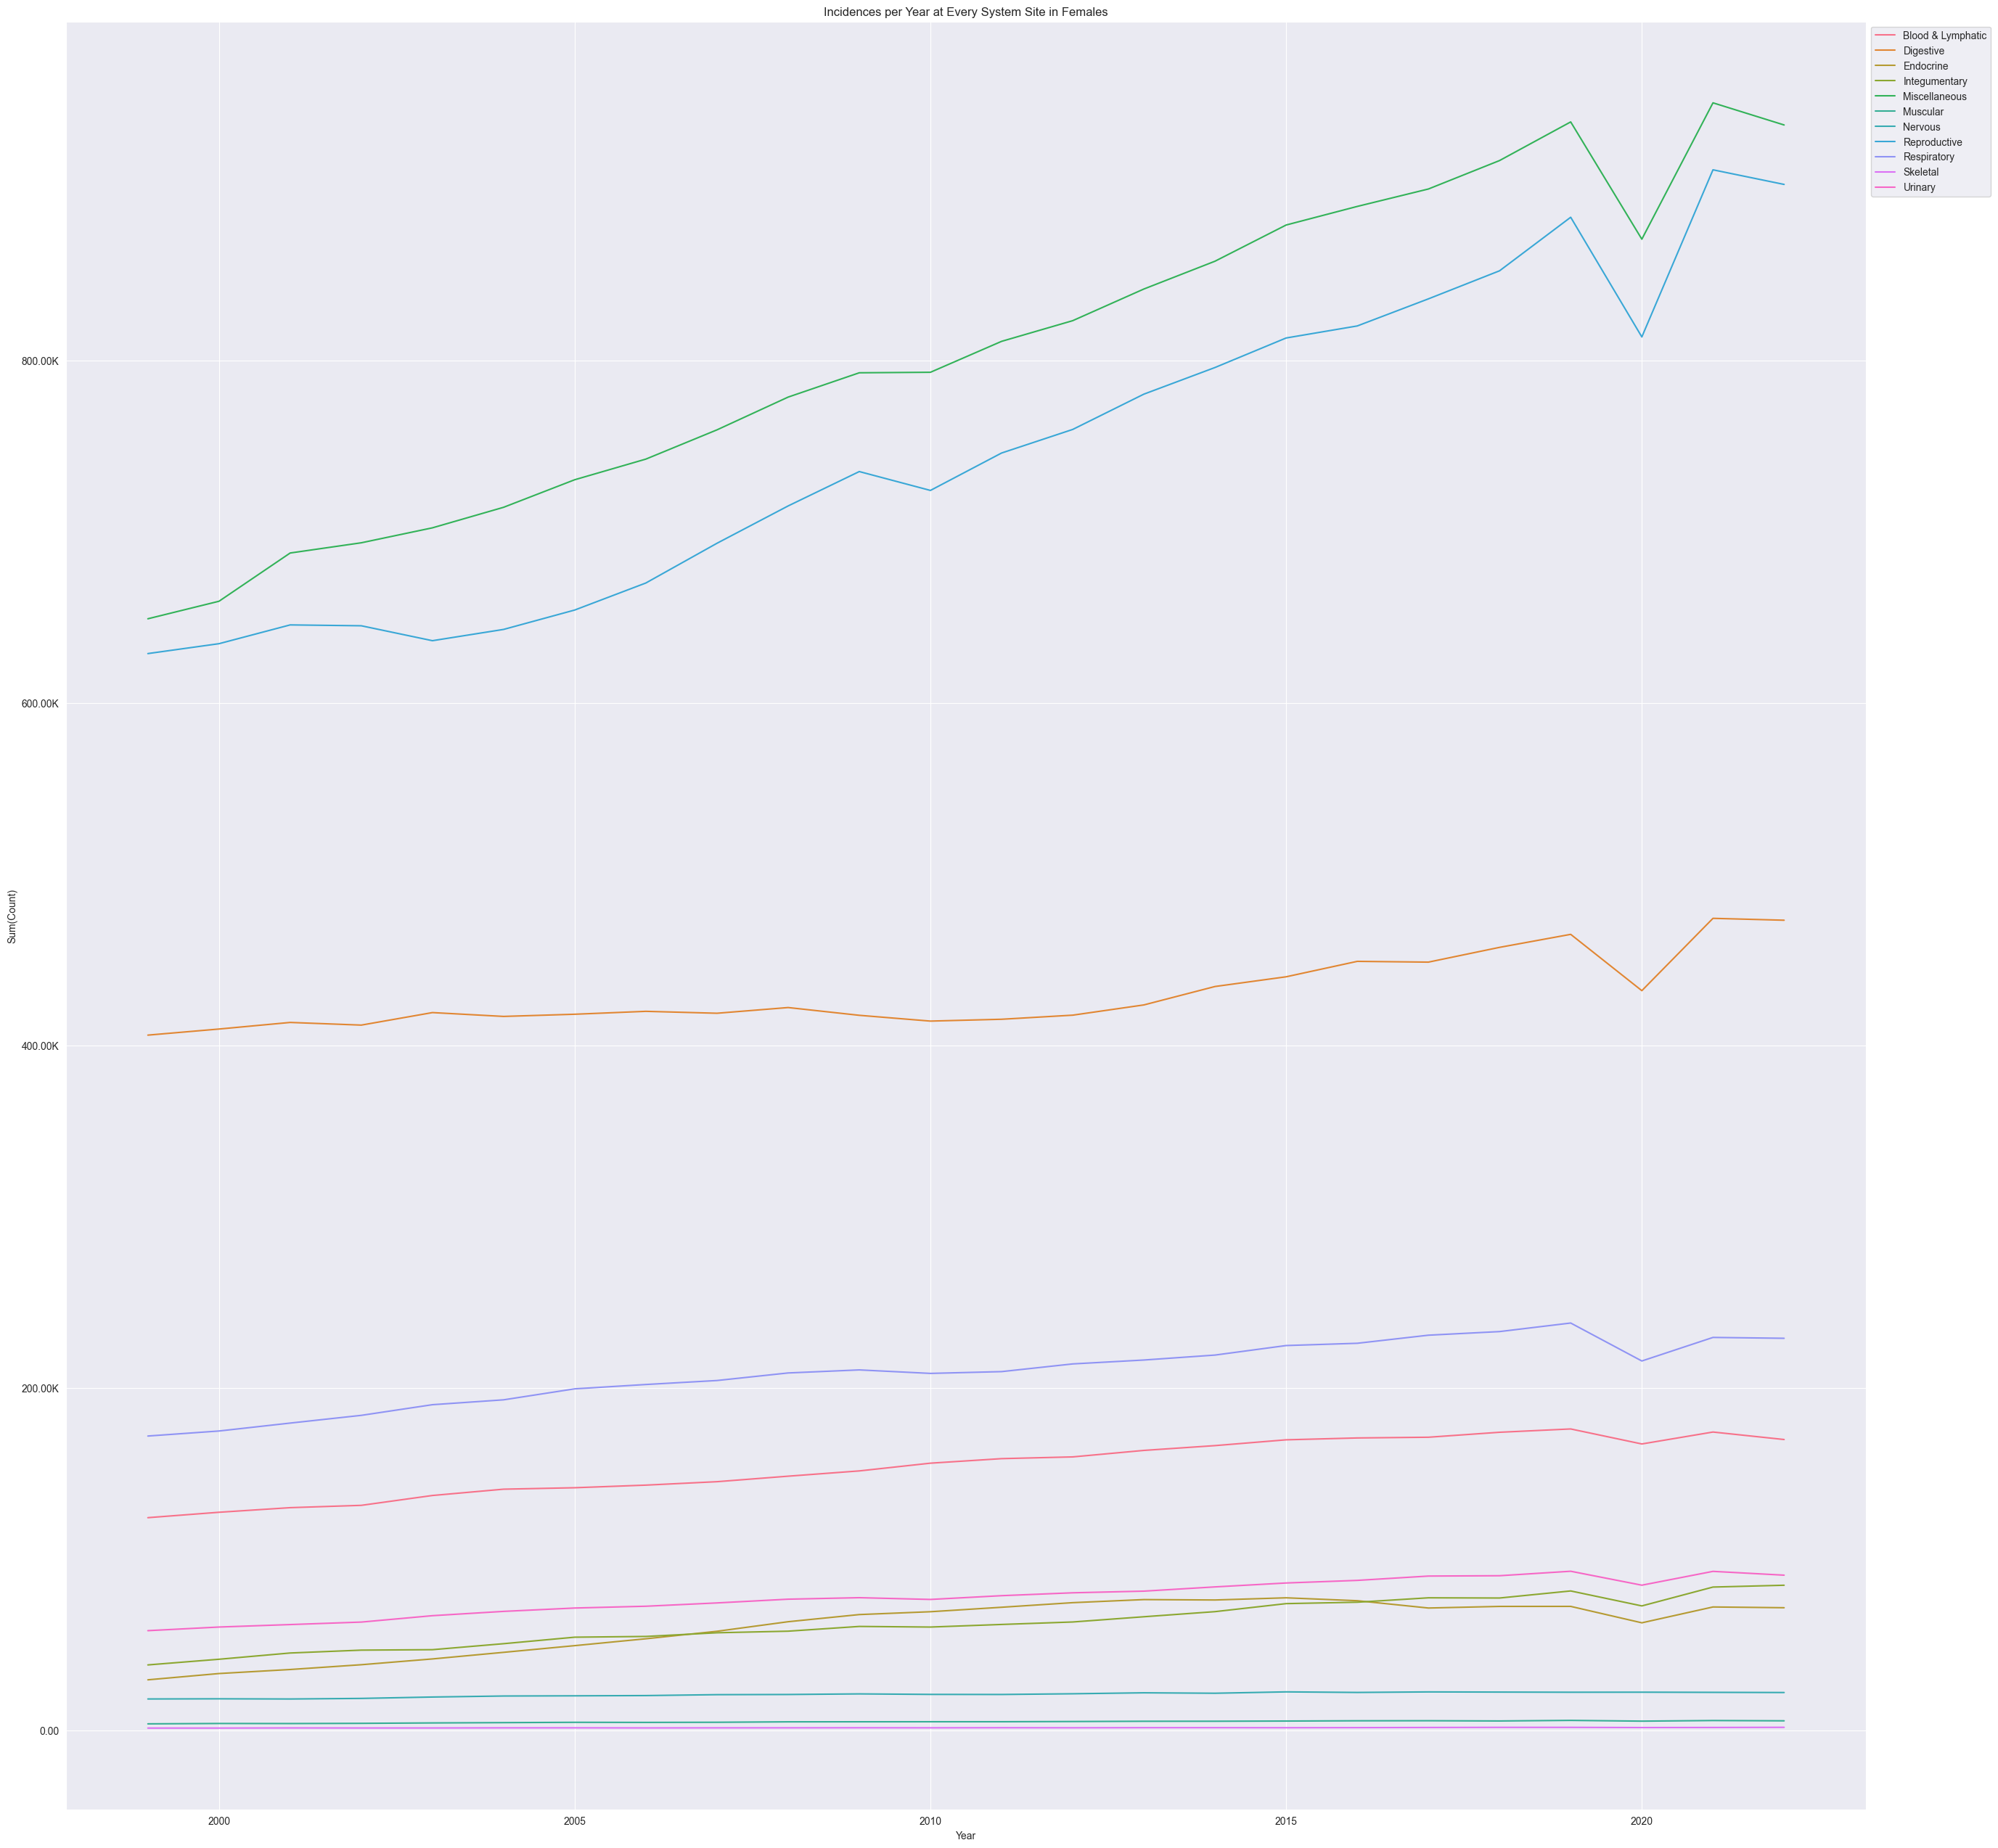

In [23]:
yearly_system_site_for_females_df = cancer_df[
    (cancer_df[SEX] == FEMALE)
].groupby(
    [YEAR, CANCER_SYSTEM_SITES, SEX]
)[COUNT].sum().reset_index(name=SUM_COUNT)

plt.figure(figsize=(32, 32))
plot = sns.lineplot(yearly_system_site_for_females_df, x=YEAR, y=SUM_COUNT, hue=CANCER_SYSTEM_SITES)
plot.yaxis.set_major_formatter(FORMATTER)
plot.set_title("Incidences per Year at Every System Site in Females")
plot.axes.legend(bbox_to_anchor=(1, 1, 0, 0))

# 5. Scatter plot for 2020

Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females

In [24]:
in_2000_df = cancer_df[cancer_df[YEAR] == 2000].sort_values([CANCER_SITES, SEX]).reset_index()[
    [CANCER_SITES, SEX, POPULATION, COUNT]]
in_2000_df.head()

,Cancer Sites,Sex,Population,Count
0,Acute Lymphocytic Leukemia,F,141865770,1788
1,Acute Lymphocytic Leukemia,M,136692444,2261
2,Acute Monocytic Leukemia,F,141865770,262
3,Acute Monocytic Leukemia,M,136692444,328
4,Acute Myeloid Leukemia,F,141865770,4837


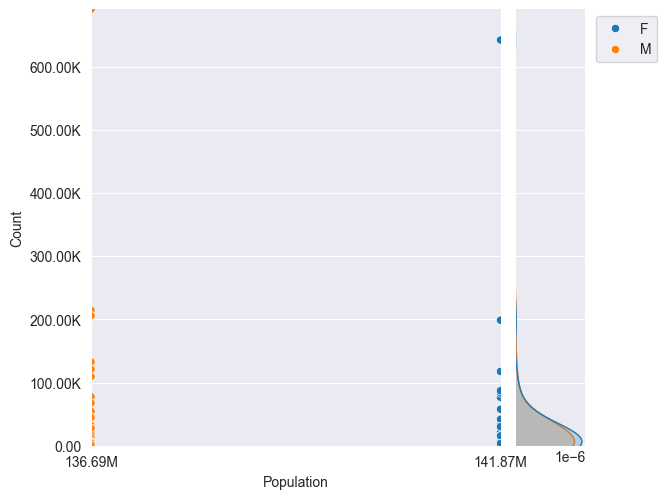

In [25]:
plot = sns.jointplot(data=in_2000_df,
                     x=POPULATION,
                     xlim=(in_2000_df[POPULATION].min(), in_2000_df[POPULATION].max()),
                     y=COUNT,
                     ylim=(in_2000_df[COUNT].min(), in_2000_df[COUNT].max()),
                     hue=SEX)
plot.ax_joint.xaxis.set_major_formatter(FORMATTER)
plot.ax_joint.yaxis.set_major_formatter(FORMATTER)
plot.ax_joint.set_xticks(sorted(in_2000_df[POPULATION].unique()))
plot.ax_joint.legend(bbox_to_anchor=(1.4, 1, 0, 0))
plot.ax_marg_x.remove()

By the kernel density estimation, there are two points, one for male and female in the +600K region, that have a low probability.
We have to consider; All Invasive Cancer Sites Combined, Invalid Value(s), Miscellaneous, so i will just use the cancer system sites I created and ignore the misc column

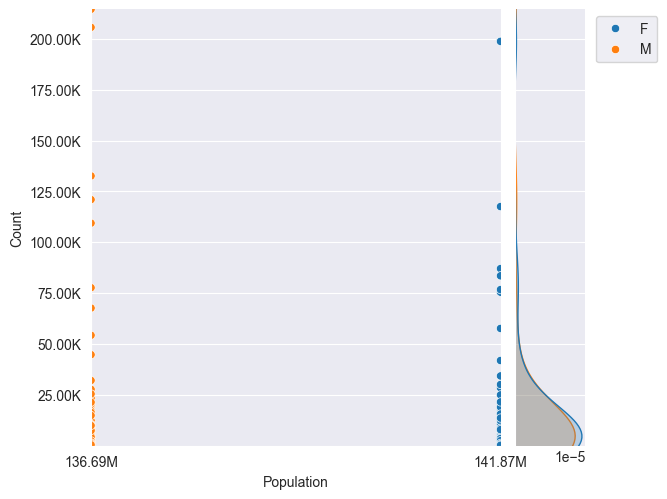

In [26]:
in_2000_df = cancer_df[
    (cancer_df[YEAR] == 2000) &
    (cancer_df[CANCER_SYSTEM_SITES] != MISC)
    ].sort_values([CANCER_SYSTEM_SITES, SEX]).reset_index()[[CANCER_SYSTEM_SITES, SEX, POPULATION, COUNT]]

plot = sns.jointplot(data=in_2000_df,
                     x=POPULATION,
                     xlim=(in_2000_df[POPULATION].min(), in_2000_df[POPULATION].max()),
                     y=COUNT,
                     ylim=(in_2000_df[COUNT].min(), in_2000_df[COUNT].max()),
                     hue=SEX)
plot.ax_joint.xaxis.set_major_formatter(FORMATTER)
plot.ax_joint.yaxis.set_major_formatter(FORMATTER)
plot.ax_joint.set_xticks(sorted(in_2000_df[POPULATION].unique()))
plot.ax_joint.legend(bbox_to_anchor=(1.4, 1, 0, 0))
plot.ax_marg_x.remove()

# 6. Bar plot for each site

Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000

In [27]:
sites_df = cancer_df[
    (cancer_df[CANCER_SITES] != ALL_INVASIVE_CANCER_SITES_COMBINED)
].groupby([CANCER_SITES])[COUNT].sum().reset_index(name=SUM_COUNT)
sites_df.head()

,Cancer Sites,Sum(Count)
0,Acute Lymphocytic Leukemia,117139
1,Acute Monocytic Leukemia,16735
2,Acute Myeloid Leukemia,323979
3,"Aleukemic, Subleukemic and NOS",46973
4,"Anus, Anal Canal and Anorectum",150782


/var/folders/2p/bfr58x5j3q7bhsbb77vmqxbw0000gn/T/ipykernel_1043/4138458379.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90, fontsize=12)


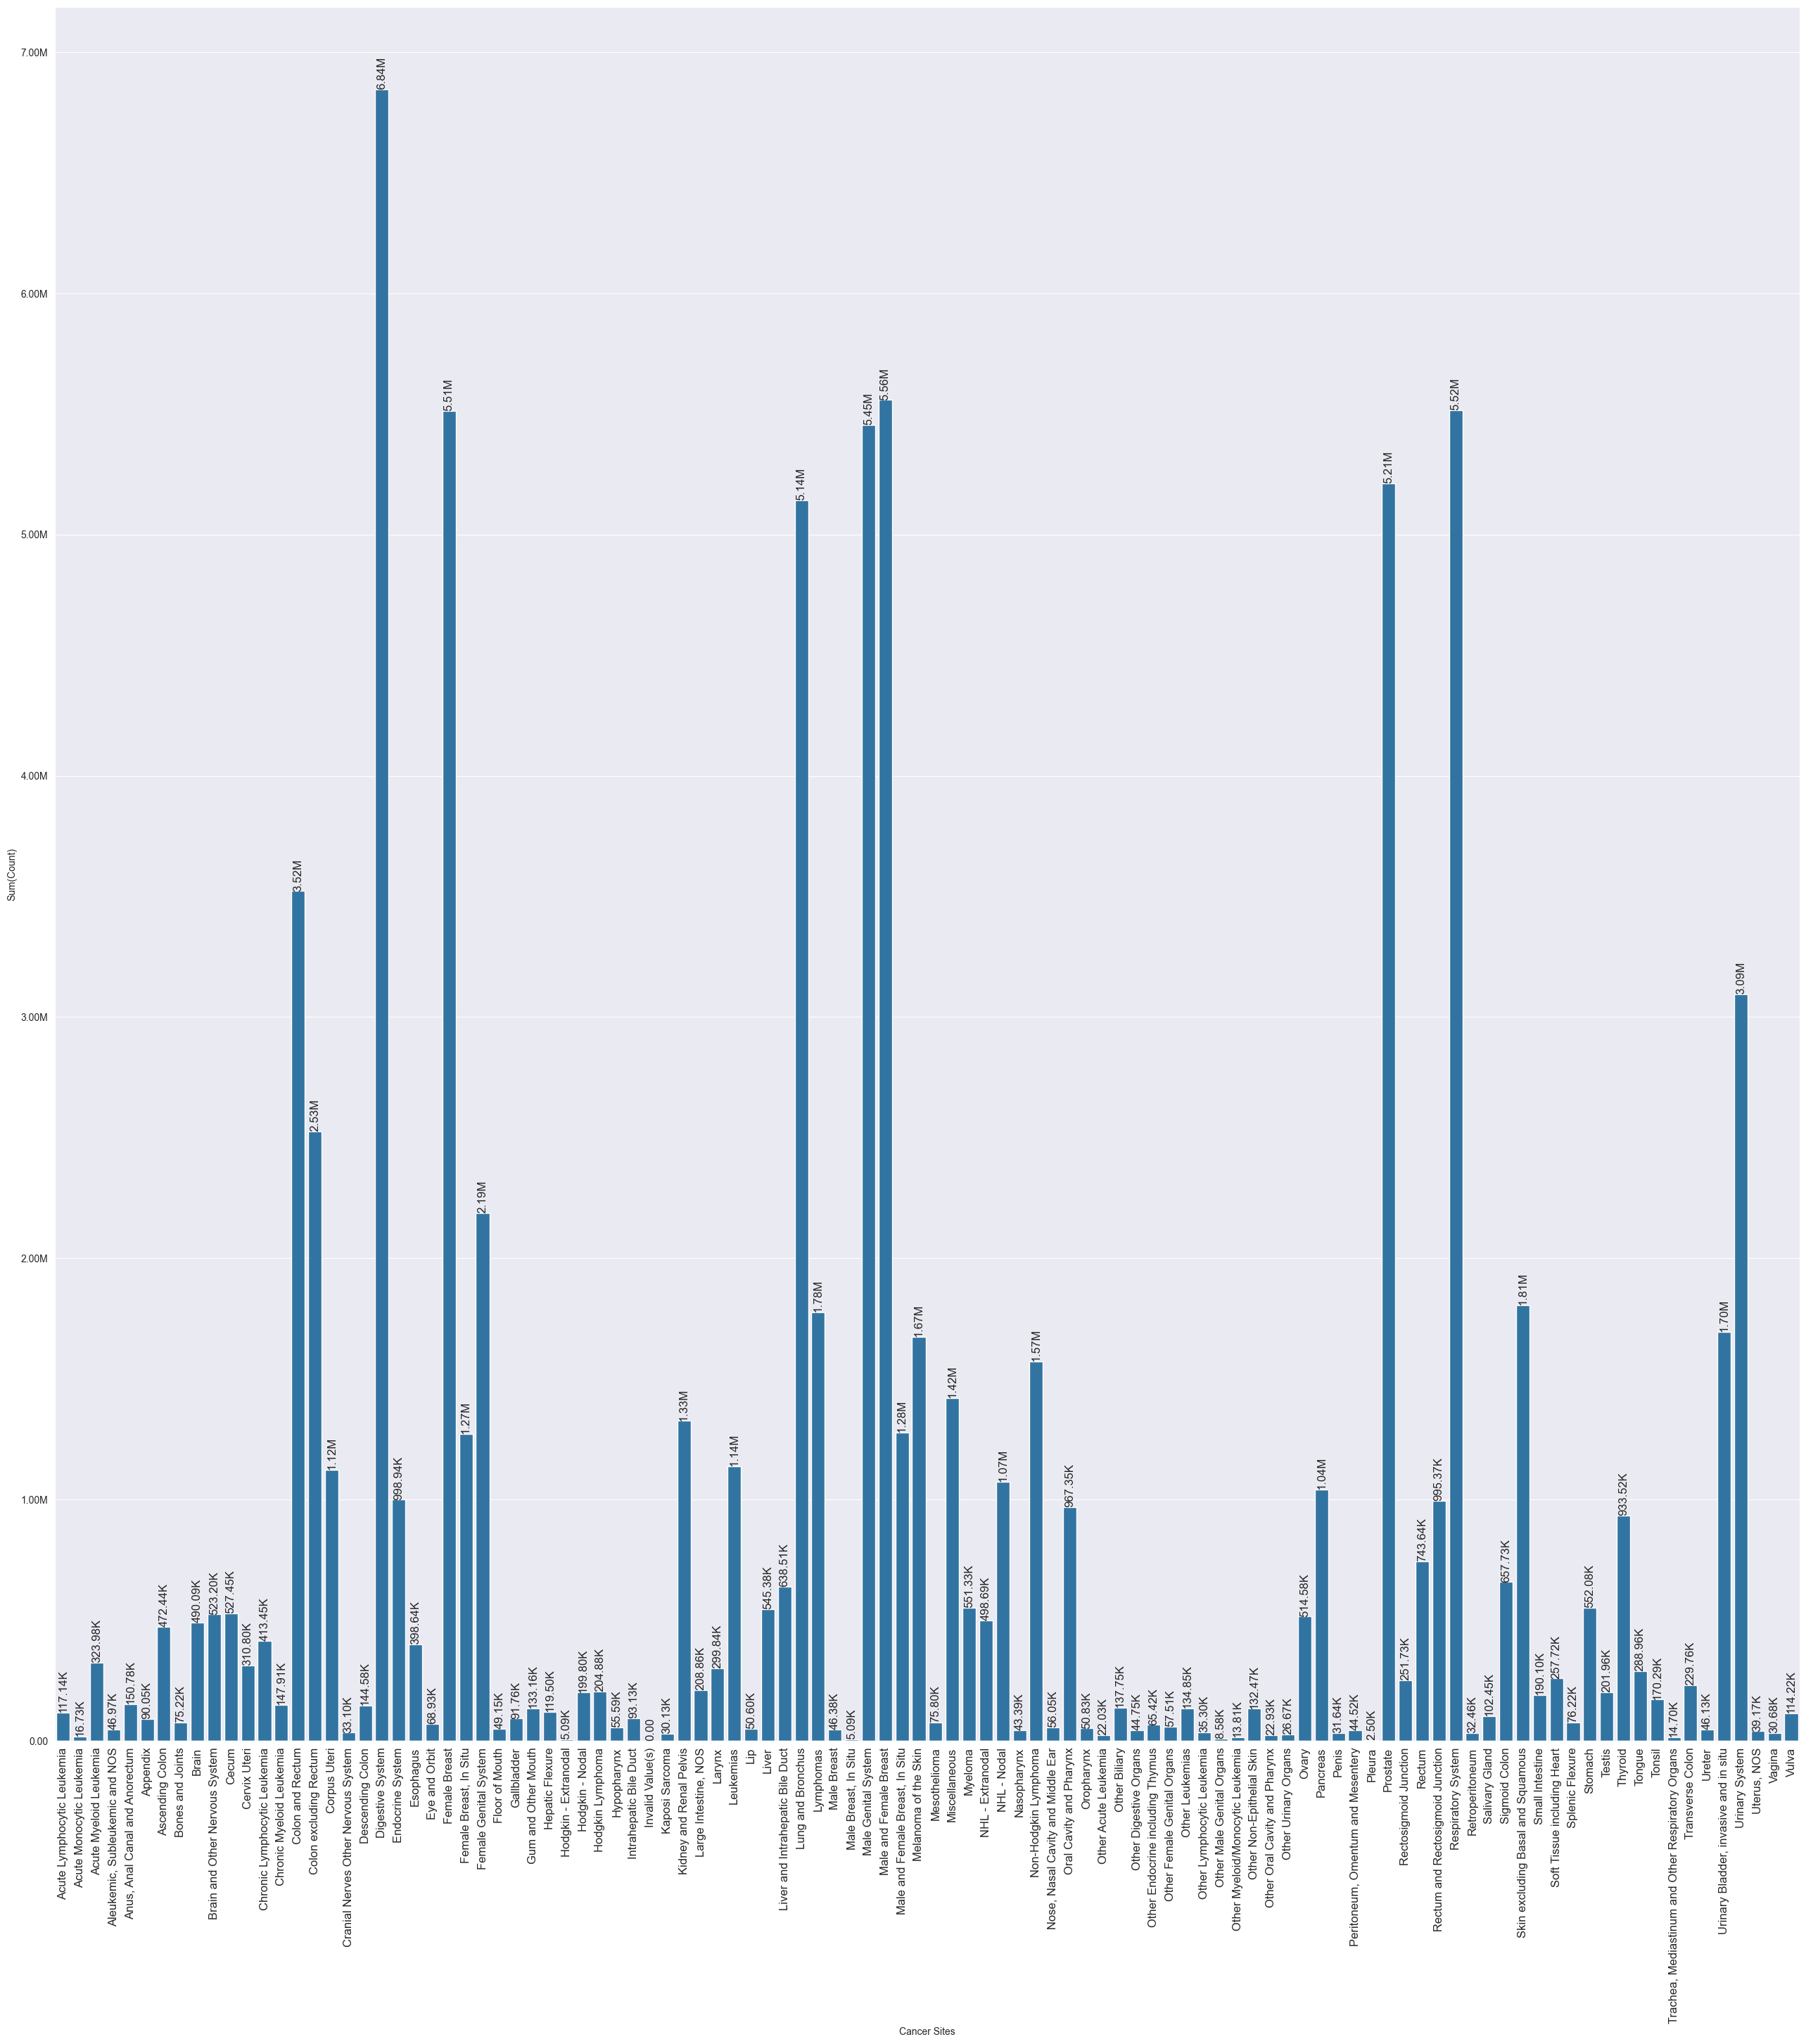

In [28]:
plt.figure(figsize=(32, 32))
plot = sns.barplot(data=sites_df, x=CANCER_SITES, y=SUM_COUNT)

plot.yaxis.set_major_formatter(FORMATTER)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, fontsize=12)

for bar in plot.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plot.text(x=x, y=y, s=FORMATTER(y), ha="center", va="bottom", fontsize=12, rotation=90)

It is extremely hard to tell what each line is because there are about 100 different sites, so we will use the mapping we made earlier and exclude miscellaneous

In [29]:
system_sites_df = cancer_df[
    (cancer_df[CANCER_SYSTEM_SITES] != MISC)
].groupby([CANCER_SYSTEM_SITES])[COUNT].sum().reset_index(name=SUM_COUNT)
system_sites_df

,Cancer System Sites,Sum(Count)
0,Blood & Lymphatic,8318498
1,Digestive,23307038
2,Endocrine,1997878
3,Integumentary,3612826
4,Muscular,257717
5,Nervous,1115320
6,Reproductive,28956224
7,Respiratory,11108065
8,Skeletal,75220
9,Urinary,6188364


/var/folders/2p/bfr58x5j3q7bhsbb77vmqxbw0000gn/T/ipykernel_1043/3411467219.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(x_labels, rotation=90)


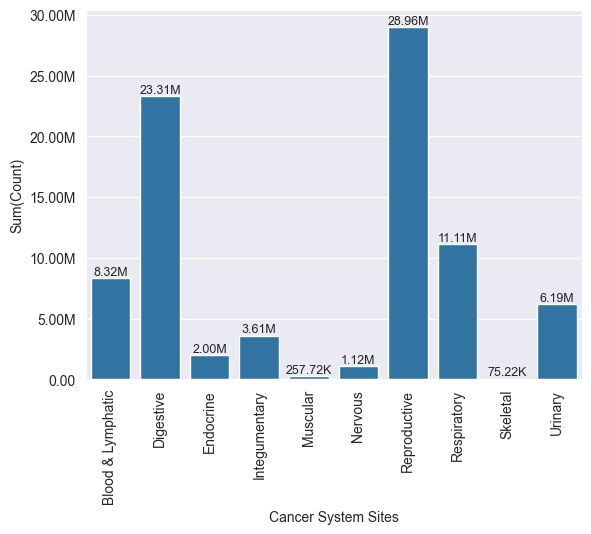

In [30]:
plot = sns.barplot(data=system_sites_df,
                   x=CANCER_SYSTEM_SITES,
                   y=SUM_COUNT)

plot.yaxis.set_major_formatter(FORMATTER)
x_labels = plot.get_xticklabels()
plot.set_xticklabels(x_labels, rotation=90)

for bar in plot.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plot.text(x=x,
              y=y,
              s=FORMATTER(y),
              ha="center",
              va="bottom",
              fontsize=9)

# 7. Higher Incidence Between Sexes

For each cancer site and each year, determine whether males or females had the higher incidence

In [31]:
sites_by_year_sites_sex_df = cancer_df.groupby([YEAR, CANCER_SITES, SEX])[COUNT].sum().reset_index(name=SUM_COUNT)

In [32]:
highest_incidences_by_year_sites_df = sites_by_year_sites_sex_df.loc[
    sites_by_year_sites_sex_df.groupby([YEAR, CANCER_SITES])[SUM_COUNT].idxmax()
].reset_index(drop=True)
highest_incidences_by_year_sites_df

,Year,Cancer Sites,Sex,Sum(Count)
0,1999,Acute Lymphocytic Leukemia,M,2188
1,1999,Acute Monocytic Leukemia,M,300
2,1999,Acute Myeloid Leukemia,M,5352
3,1999,"Aleukemic, Subleukemic and NOS",M,736
4,1999,All Invasive Cancer Sites Combined,M,672530
...,...,...,...,...
2515,2022,"Urinary Bladder, invasive and in situ",M,58506
2516,2022,Urinary System,M,106289
2517,2022,"Uterus, NOS",F,2080
2518,2022,Vagina,F,1394


# 8. Pivot table for cancer / year

Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined

In [33]:
pivot_df = pd.pivot_table(
    cancer_df,
    index=CANCER_SITES,
    columns=YEAR,
    values=COUNT,
    aggfunc='sum')
pivot_df

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Cancer Sites,,,,,,,,,,,,,,,,,,,,,
Acute Lymphocytic Leukemia,3840,4049,4159,4122,4208,4429,4342,4550,4678,4884,...,4872,5091,5396,5416,5403,5705,5585,5545,5434,5439
Acute Monocytic Leukemia,549,590,690,704,767,783,774,767,934,823,...,678,684,698,688,665,673,631,571,548,446
Acute Myeloid Leukemia,10000,10644,10776,10452,10844,10901,10737,11060,11200,11644,...,14955,15521,15344,15706,15742,16405,16971,16604,17135,17266
"Aleukemic, Subleukemic and NOS",1385,1403,1390,1412,1512,1507,1569,1603,1820,1771,...,2379,2336,2427,2127,2235,2367,2313,2368,2446,2248
All Invasive Cancer Sites Combined,1304271,1332566,1377750,1394720,1408190,1431604,1460548,1496800,1542471,1565155,...,1640952,1667957,1713267,1740066,1774849,1806799,1858563,1718755,1869872,1851238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Urinary Bladder, invasive and in situ",59051,60389,60862,62138,63836,65631,66706,65849,67731,68898,...,74645,75838,76475,77151,78207,77801,78932,74953,79510,76529
Urinary System,94493,97794,100484,103705,108290,112325,115844,117595,121451,125054,...,137170,140841,144305,146994,150071,151149,155416,145779,155747,151549
"Uterus, NOS",1173,1236,1244,1276,1313,1246,1297,1266,1293,1445,...,1685,1874,1936,1963,1927,2063,2244,2029,2280,2080
